In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply

In [2]:
import chardet

In [3]:
with open('rounds2.csv','rb') as rawdata_rounds:
    result  = chardet.detect(rawdata_rounds.read(10000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [4]:
rounds2 = pd.read_csv('rounds2.csv',encoding='palmos')
companies = pd.read_csv('companies.csv',encoding='palmos')

In [5]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
#Chaning the permalink and company_permalink column vairables in to upper case to avoid duplicity.
rounds2.company_permalink = rounds2.company_permalink.str.upper()
companies.permalink  = companies.permalink.str.upper()

In [8]:
# Checkpoint 1 ---> Finding the number of unique values in both companies and rounds datasets
companies.permalink.unique().size, rounds2.company_permalink.unique().size

(66368, 66368)

In [9]:
rounds2[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [10]:
companies.name[companies.name.isnull()] = 'tell it in'

In [11]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66368 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [12]:
# Merging rounds and companies dataframes on common column company_permalink
master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink')

In [13]:
master_frame.shape

(114949, 16)

In [14]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114949 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [15]:
# Finding the representative funding amount for venture type.
master_frame.raised_amount_usd[master_frame.funding_round_type == 'venture'].describe(include = 'all')

count    5.022800e+04
mean     1.174895e+07
std      8.635207e+07
min      0.000000e+00
25%      1.600902e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [16]:
# Checkpoint 2 ------> Finding the representative funding amount for angel type.
master_frame.raised_amount_usd[master_frame.funding_round_type == 'angel'].describe(include = 'all')

count    4.860000e+03
mean     9.586945e+05
std      7.404397e+06
min      0.000000e+00
25%      1.500000e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [17]:
# Checkpoint 2 ------> Finding the representative funding amount for seed type.
master_frame.raised_amount_usd[master_frame.funding_round_type == 'seed'].describe(include = 'all')

count    2.360300e+04
mean     7.198180e+05
std      2.221733e+06
min      0.000000e+00
25%      5.500000e+04
50%      2.750000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [18]:
# Checkpoint 2 ------> Finding the representative funding amount for private equity type.
master_frame.raised_amount_usd[master_frame.funding_round_type == 'private_equity'].describe(include = 'all')

count    1.936000e+03
mean     7.330859e+07
std      1.981135e+08
min      0.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [19]:
master_frame_main = master_frame

In [20]:
#Filtering data frame with funding type as venture
master_frame = master_frame[master_frame.funding_round_type=='venture']

In [21]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        55494 non-null  object 
 1   funding_round_permalink  55494 non-null  object 
 2   funding_round_type       55494 non-null  object 
 3   funding_round_code       30985 non-null  object 
 4   funded_at                55494 non-null  object 
 5   raised_amount_usd        50228 non-null  float64
 6   permalink                55494 non-null  object 
 7   name                     55494 non-null  object 
 8   homepage_url             52549 non-null  object 
 9   category_list            54362 non-null  object 
 10  status                   55494 non-null  object 
 11  country_code             52619 non-null  object 
 12  state_code               51698 non-null  object 
 13  region                   51940 non-null  object 
 14  city                 

In [22]:
master_frame.country_code.value_counts()[0:9]

USA    38372
GBR     2303
CHN     2087
CAN     1346
IND      992
FRA      985
ISR      910
DEU      786
ESP      343
Name: country_code, dtype: int64

In [23]:
# Checkpoint 3 ------> Country analysis, Finding top 3 english speaking countries and filtering the dataframe
master_frame = master_frame[(master_frame.country_code == 'USA') | (master_frame.country_code == 'GBR') | (master_frame.country_code == 'CAN')]

In [24]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42021 entries, 1 to 114936
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        42021 non-null  object 
 1   funding_round_permalink  42021 non-null  object 
 2   funding_round_type       42021 non-null  object 
 3   funding_round_code       22640 non-null  object 
 4   funded_at                42021 non-null  object 
 5   raised_amount_usd        39450 non-null  float64
 6   permalink                42021 non-null  object 
 7   name                     42021 non-null  object 
 8   homepage_url             40017 non-null  object 
 9   category_list            41630 non-null  object 
 10  status                   42021 non-null  object 
 11  country_code             42021 non-null  object 
 12  state_code               41942 non-null  object 
 13  region                   41848 non-null  object 
 14  city                 

In [25]:
mapping = pd.read_csv('mapping.csv')

In [26]:
mapping.head(3)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0


In [27]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [28]:
value_vars = list(mapping.columns[1:])
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

print(value_vars,"\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [29]:
# converting wide datafrme to long dataframe for better ease of analysis
long_mapping = pd.melt(mapping, id_vars= id_vars, value_vars= value_vars)
long_mapping

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [30]:
long_mapping = long_mapping[long_mapping['value']==1]
long_mapping.head(4)

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1


In [31]:
long_mapping = long_mapping.drop('value',axis=1)
long_mapping.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [32]:
long_mapping = long_mapping.rename(columns={'variable': 'sector'})
long_mapping.head()

,category_list,sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [33]:
master_frame = master_frame[~master_frame.category_list.isnull()]

In [34]:
# Checkpoint 4 ------> Sector anlysis, spliting the category list for companies having multiple category and taking first string as primary category.
master_frame.category_list = master_frame.category_list.apply(lambda x: x.split('|')[0])

In [35]:
master_frame = pd.merge(master_frame,long_mapping,left_on='category_list',right_on='category_list')

In [36]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,sector
0,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging"
1,/ORGANIZATION/AAROHI-COMMUNICATION,/funding-round/1860d75993627f37c4b1a17b97a83502,venture,NaN,01-08-2001,NaN,/ORGANIZATION/AAROHI-COMMUNICATION,Aarohi communication,http://www.aarohi.net/,Application Platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,"News, Search and Messaging"
2,/ORGANIZATION/AAROHI-COMMUNICATION,/funding-round/84f519482b29b686a0c6b59ff383d386,venture,NaN,29-08-2003,6000000.0,/ORGANIZATION/AAROHI-COMMUNICATION,Aarohi communication,http://www.aarohi.net/,Application Platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,"News, Search and Messaging"
3,/ORGANIZATION/AAROHI-COMMUNICATION,/funding-round/b0f47948e427b6c91a50128373273abf,venture,B,06-12-2002,8000000.0,/ORGANIZATION/AAROHI-COMMUNICATION,Aarohi communication,http://www.aarohi.net/,Application Platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,"News, Search and Messaging"
4,/ORGANIZATION/ALLEGRO-NETWORKS,/funding-round/e2c35bf4ea04c31d391743ff13de3c65,venture,B,04-02-2002,60000000.0,/ORGANIZATION/ALLEGRO-NETWORKS,Allegro Networks,http://www.allegronetworks.com,Application Platforms,closed,USA,CA,SF Bay Area,San Jose,01-01-2000,"News, Search and Messaging"


In [37]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38797 entries, 0 to 38796
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        38797 non-null  object 
 1   funding_round_permalink  38797 non-null  object 
 2   funding_round_type       38797 non-null  object 
 3   funding_round_code       20721 non-null  object 
 4   funded_at                38797 non-null  object 
 5   raised_amount_usd        36618 non-null  float64
 6   permalink                38797 non-null  object 
 7   name                     38797 non-null  object 
 8   homepage_url             36947 non-null  object 
 9   category_list            38797 non-null  object 
 10  status                   38797 non-null  object 
 11  country_code             38797 non-null  object 
 12  state_code               38720 non-null  object 
 13  region                   38629 non-null  object 
 14  city                  

In [38]:
master_frame.funding_round_type.value_counts()

venture    38797
Name: funding_round_type, dtype: int64

In [39]:
# Checkpoint 5 ------> Finding observations in top 3 english speaking countries with 8 main sectors
master_frame.country_code.value_counts()

USA    35421
GBR     2120
CAN     1256
Name: country_code, dtype: int64

In [40]:
D1 = master_frame[(master_frame.country_code == 'USA') & 
                  ((master_frame.raised_amount_usd > 4999999.99) | (master_frame.raised_amount_usd < 15000001))]

In [41]:
D2 = master_frame[(master_frame.country_code == 'GBR') & 
                  ((master_frame.raised_amount_usd > 4999999.99) | (master_frame.raised_amount_usd < 15000001))]

In [42]:
D3 = master_frame[(master_frame.country_code == 'CAN') & 
                  ((master_frame.raised_amount_usd > 4999999.99) | (master_frame.raised_amount_usd < 15000001))]

In [43]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33526 entries, 2 to 38796
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        33526 non-null  object 
 1   funding_round_permalink  33526 non-null  object 
 2   funding_round_type       33526 non-null  object 
 3   funding_round_code       18015 non-null  object 
 4   funded_at                33526 non-null  object 
 5   raised_amount_usd        33526 non-null  float64
 6   permalink                33526 non-null  object 
 7   name                     33526 non-null  object 
 8   homepage_url             31898 non-null  object 
 9   category_list            33526 non-null  object 
 10  status                   33526 non-null  object 
 11  country_code             33526 non-null  object 
 12  state_code               33511 non-null  object 
 13  region                   33493 non-null  object 
 14  city                  

In [44]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 18 to 38785
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        1916 non-null   object 
 1   funding_round_permalink  1916 non-null   object 
 2   funding_round_type       1916 non-null   object 
 3   funding_round_code       952 non-null    object 
 4   funded_at                1916 non-null   object 
 5   raised_amount_usd        1916 non-null   float64
 6   permalink                1916 non-null   object 
 7   name                     1916 non-null   object 
 8   homepage_url             1833 non-null   object 
 9   category_list            1916 non-null   object 
 10  status                   1916 non-null   object 
 11  country_code             1916 non-null   object 
 12  state_code               1863 non-null   object 
 13  region                   1798 non-null   object 
 14  city                  

In [45]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 34 to 38768
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        1176 non-null   object 
 1   funding_round_permalink  1176 non-null   object 
 2   funding_round_type       1176 non-null   object 
 3   funding_round_code       552 non-null    object 
 4   funded_at                1176 non-null   object 
 5   raised_amount_usd        1176 non-null   float64
 6   permalink                1176 non-null   object 
 7   name                     1176 non-null   object 
 8   homepage_url             1122 non-null   object 
 9   category_list            1176 non-null   object 
 10  status                   1176 non-null   object 
 11  country_code             1176 non-null   object 
 12  state_code               1171 non-null   object 
 13  region                   1171 non-null   object 
 14  city                  

In [46]:
D1.raised_amount_usd.sum()

392237581395.0

In [47]:
D2.raised_amount_usd.sum()

18924390319.0

In [48]:
D3.raised_amount_usd.sum()

8715620524.0

In [49]:
D1.sector.value_counts()

Others                                     8243
Cleantech / Semiconductors                 7849
Social, Finance, Analytics, Advertising    5156
News, Search and Messaging                 4301
Health                                     3263
Manufacturing                              2453
Entertainment                              1756
Automotive & Sports                         505
Name: sector, dtype: int64

In [50]:
D2.sector.value_counts()

Others                                     507
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
News, Search and Messaging                 241
Entertainment                              133
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Name: sector, dtype: int64

In [51]:
D3.sector.value_counts()

Cleantech / Semiconductors                 329
Others                                     326
Social, Finance, Analytics, Advertising    164
News, Search and Messaging                 132
Manufacturing                              100
Health                                      61
Entertainment                               50
Automotive & Sports                         14
Name: sector, dtype: int64

In [52]:
(D1.raised_amount_usd[D1.sector == 'Others'].size , D1.raised_amount_usd[D1.sector == 'Cleantech / Semiconductors'].size ,
D1.raised_amount_usd[D1.sector == 'Social, Finance, Analytics, Advertising'].size)

(8243, 7849, 5156)

In [53]:
(D2.raised_amount_usd[D2.sector == 'Others'].size , D2.raised_amount_usd[D2.sector == 'Cleantech / Semiconductors'].size ,
D2.raised_amount_usd[D2.sector == 'Social, Finance, Analytics, Advertising'].size)

(507, 433, 318)

In [54]:
(D3.raised_amount_usd[D3.sector == 'Cleantech / Semiconductors'].size , D3.raised_amount_usd[D3.sector == 'Others'].size ,
D3.raised_amount_usd[D3.sector == 'Social, Finance, Analytics, Advertising'].size)

(329, 326, 164)

In [55]:
D1.name[D1.sector == 'Others'].value_counts()

Terascala         13
VectorMAX         12
Lecere            11
BTI Systems       10
Delivery Agent     9
                  ..
Loopster           1
MediSwipe          1
StyleSaint         1
Accurence          1
Doculynx           1
Name: name, Length: 4632, dtype: int64

In [56]:
D1.name[D1.sector == 'Cleantech / Semiconductors'].value_counts()

Tigo Energy                    12
Galectin Therapeutics          12
Aviir                          12
Covenant Surgical Partners     12
CNS Response                   11
                               ..
Soma                            1
Manhattan Pharmaceuticals       1
Santa Maria Biotherapeutics     1
ProChon Biotech                 1
Element Power                   1
Name: name, Length: 3775, dtype: int64

In [57]:
D2.name[D2.sector == 'Others'].value_counts()

Rostima           8
Electric Cloud    7
Helveta           6
picoChip          6
Farfetch          5
                 ..
Bloom & Wild      1
Ideagen           1
Breeze Tech       1
VYRE Limited      1
Proversity        1
Name: name, Length: 347, dtype: int64

In [58]:
D2.name[D2.sector == 'Cleantech / Semiconductors'].value_counts()

Population Genetics Technologies    6
Green Biologics                     6
Horizon Discovery                   5
Sirigen                             5
F-star Biotechnology Limited        5
                                   ..
Convergence Pharmaceuticals         1
Crysalin                            1
Lumicity                            1
Inivata                             1
Sernova                             1
Name: name, Length: 274, dtype: int64

In [59]:
D3.name[D3.sector == 'Cleantech / Semiconductors'].value_counts()

Amorfix Life Sciences       9
D-Wave Systems              7
Zymeworks                   6
Aquinox Pharmaceuticals     6
Ostara                      5
                           ..
Biopharmacopae              1
Smart Energy Instruments    1
NovX                        1
Telesta Therapeutics        1
Medicago                    1
Name: name, Length: 174, dtype: int64

In [60]:
D3.name[D3.sector == 'Others'].value_counts()

Creation Technologies         9
Teradici                      6
HighRoads                     6
Respect Your Universe, Inc    6
BuildDirect                   5
                             ..
Roam I.T.                     1
iMPath Networks               1
Guard RFID Solutions          1
Thoughtexchange               1
OnCorp Direct                 1
Name: name, Length: 203, dtype: int64

In [61]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,sector
2,/ORGANIZATION/AAROHI-COMMUNICATION,/funding-round/84f519482b29b686a0c6b59ff383d386,venture,NaN,29-08-2003,6000000.0,/ORGANIZATION/AAROHI-COMMUNICATION,Aarohi communication,http://www.aarohi.net/,Application Platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,"News, Search and Messaging"
3,/ORGANIZATION/AAROHI-COMMUNICATION,/funding-round/b0f47948e427b6c91a50128373273abf,venture,B,06-12-2002,8000000.0,/ORGANIZATION/AAROHI-COMMUNICATION,Aarohi communication,http://www.aarohi.net/,Application Platforms,acquired,USA,CA,SF Bay Area,San Jose,NaN,"News, Search and Messaging"
4,/ORGANIZATION/ALLEGRO-NETWORKS,/funding-round/e2c35bf4ea04c31d391743ff13de3c65,venture,B,04-02-2002,60000000.0,/ORGANIZATION/ALLEGRO-NETWORKS,Allegro Networks,http://www.allegronetworks.com,Application Platforms,closed,USA,CA,SF Bay Area,San Jose,01-01-2000,"News, Search and Messaging"
5,/ORGANIZATION/ALLEGRO-NETWORKS,/funding-round/e663536201b178a622f2b95ac327f92c,venture,NaN,04-10-2001,50000000.0,/ORGANIZATION/ALLEGRO-NETWORKS,Allegro Networks,http://www.allegronetworks.com,Application Platforms,closed,USA,CA,SF Bay Area,San Jose,01-01-2000,"News, Search and Messaging"
6,/ORGANIZATION/APPIAN,/funding-round/03d773ec8baf30fae9fb6364df3f9c6c,venture,NaN,03-03-2014,37499994.0,/ORGANIZATION/APPIAN,Appian,http://www.appian.com,Application Platforms,operating,USA,VA,"Washington, D.C.",Reston,17-08-1999,"News, Search and Messaging"


In [62]:
master_frame.funding_round_type.value_counts()

venture    38797
Name: funding_round_type, dtype: int64

In [63]:
master_frame_main.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [64]:
import seaborn as sns

In [65]:
master_frame_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114949 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [66]:
master_frame_main = master_frame_main[~master_frame_main.raised_amount_usd.isnull()]

In [67]:
master_frame_main = master_frame_main[(master_frame_main.funding_round_type == 'angel') |
                                     (master_frame_main.funding_round_type == 'seed') |
                                     (master_frame_main.funding_round_type == 'private_equity') |
                                     (master_frame_main.funding_round_type == 'venture')]

In [68]:
master_frame_main = master_frame_main[(master_frame_main.country_code == 'USA') |
                                     (master_frame_main.country_code == 'GBR') |
                                     (master_frame_main.country_code == 'CAN') |
                                     (master_frame_main.country_code == 'IND') |
                                     (master_frame_main.country_code == 'ISR') |
                                     (master_frame_main.country_code == 'AUS') |
                                     (master_frame_main.country_code == 'SGP') |
                                     (master_frame_main.country_code == 'IRL') |
                                     (master_frame_main.country_code == 'NLD')]

In [69]:
master_frame_main = master_frame_main[(master_frame_main.raised_amount_usd > 4999999.99) & (master_frame_main.raised_amount_usd < 15000001)]

In [70]:
master_frame_main = master_frame_main[~master_frame_main.category_list.isnull()]

In [71]:
master_frame_main.category_list = master_frame_main.category_list.apply(lambda x: x.split('|')[0])

In [72]:
master_frame_main = pd.merge(master_frame_main,long_mapping,left_on='category_list',right_on='category_list')

In [73]:
Funding_df = {'funding_type' : ['seed','angel','venture','private equity'], 'Representative_funding' : [275000,400000,5000000,20000000]}

In [74]:
funding_rf = pd.DataFrame(data=Funding_df)

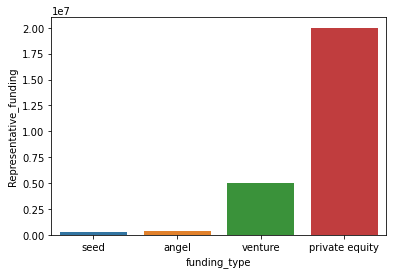

<Figure size 432x288 with 0 Axes>

In [75]:
# Checkpoint 6 ------> Plots
sns.barplot(data = funding_rf, x='funding_type', y='Representative_funding')
ply.show()

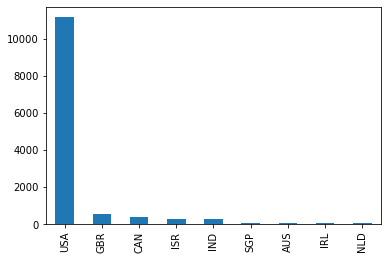

In [76]:
master_frame_main.country_code[master_frame_main.funding_round_type == 'venture'].value_counts().plot.bar()
ply.show()

In [77]:
venture = master_frame_main[master_frame_main.funding_round_type == 'venture']

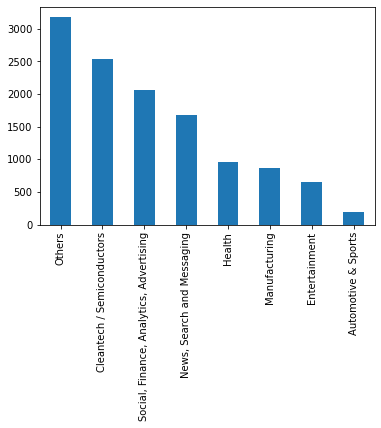

In [78]:
venture.sector[(venture.country_code == 'USA') | (venture.country_code == 'GBR') | (venture.country_code == 'CAN')].value_counts().plot.bar()
ply.show()